<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/MARCA-Color.jpg" title="Title text" width="50%" height="50%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales II-2018 </h1>

<H3 align='center'> Tarea 2 - Redes Convolucionales y sus aplicaciones </H3>
<hr style="height:2px;border:none"/>



**Temas**  
* Diseño y entrenamiento de Redes Neuronales Convolucionales (CNNs).
* Regularización en Redes Convolucionales.
* *Transfer Learning.*
* Aplicaciones de las Redes Neuronales Convolucionales

**Formalidades**  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* **Fecha de entrega y discusión: 23 de Noviembre**
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<margarita.bugueno.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<cvalle@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea2-INF395-II-2018] 

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Convolutional Neural Networks (CNN) en CIFAR.  
[2.](#segundo) Transfer Learning.   
[3.](#tercero) Convolutional Neural Network sobre texto.


### **Nota Importante:**  
Para esta actividad **si es que no se cuenta con GPU** se recomienda utilizar el entorno virtual de __[Colaboratory - Google](https://colab.research.google.com/)__* . Así, podrá programar en la nube con recursos elevados y luego descargar el Jupyter Notebook y entregarlo en modo Informe.


<a id="primero"></a>
## 1. Convolutional Neural Networks (CNN) en CIFAR 

En esta sección trabajaremos con un dataset bastante conocido y utilizado por la comunidad para experimentar reconocimiento de objetos en imágenes: CIFAR10 [3]. Se trata de un conjunto de 60.000 imágenes RGB de 32 × 32 pixeles que contiene 10 clases de objetos y 6000 ejemplos por clase. La versión utilizada se le atribuye a *A. Krizhevsky, V. Nair* y *G. Hinton* y viene separada en 50000 ejemplos de entrenamiento y 10000 casos de prueba que fueron obtenidos seleccionando 1000 imágenes aleatorias de cada clase.  
Los datos restantes han sido ordenados aleatoriamente y están organizados en 5 bloques de entrenamiento o batches. Cabe destacar que las clases son mutuamente excluyentes y corresponden a las siguientes categorı́as: 

* Gato
* Perro
* Rana
* Caballo
* Pájaro
* Ciervo
* Avión
* Automóvil
* Camión 
* Barco

Para esta tarea se experimentará con redes convolucionales, conocidas como CNNs ó ConvNets.  
**Nota:** Para esta actividad es bastante aconsejable entrenar las redes usando una GPU, ya que de otro modo los tiempos de entrenamiento serán largos. Recuerde instalar Keras con gpu y el driver de cuda para la tarjeta gráfica.  

> **a)** Construya una función que cargue todos los bloques de entrenamiento y pruebas del problema CIFAR generando como salida:  
(i) dos matrices  Xtr, Ytr; correspondientes a las imágenes y etiquetas de entrenamiento  
(ii) dos matrices Xt, Yt; correspondientes a las imágenes y etiquetas de pruebas  
(iii) dos matrices Xv, Yv; correspondientes a las imágenes y etiquetas que se usarán como conjunto de validación (para tomar decisiones de diseño acerca del modelo)  

> **Este último conjunto debe ser extraı́do desde el conjunto de entrenamiento original y no debe superar las 5000 imágenes.**

> ```python
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']  
import numpy as np   
import os   
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
```

> **b)** Prepare subconjuntos de entrenamiento, validación y pruebas normalizando las imágenes de entrenamiento y pruebas, dividiendo las intensidades originales de pixel en cada canal por 255.  Es importante notar que si desea trabajar con el orden de las dimensiones denominado ’tf’ (por defecto para TensorFlow) deberá realizar la transposición correspondiente para dejar el canal en donde corresponda. Finalmente, genere una representación adecuada de las salidas deseadas de la red.
```python
import keras
x_train = x_train.transpose([0, 3, 1, 2]) #only if 'tf' dim-ordering is to be used
x_test= x_test.transpose([0, 3, 1, 2]) #remove if 'th' dim-ordering is to be used
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
```

> **c)** Defina una CNN con arquitectura $C \times P \times C \times P \times F \times F$. Para ambas capas convolucionales utilice 64 filtros de $3 \times 3$ y funciones de activación ReLU. Para las capas de pooling utilice filtros de $2 \times 2$ con stride 2. Para la capa MLP escondida use 512 neuronas. Genere un esquema lo más compacto posible que muestre los cambios de forma (dimensionalidad) que experimenta un patrón de entrada a medida que se ejecuta un forward-pass y el número de parámetros de cada capa.
```python
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()
```


> **d)**  Entrene la CNN definida en **c)** utilizando SGD. En este dataset, una tasa de aprendizaje “segura” es $\eta = 10^{-4}$ o inferior, pero durante las primeras *epochs* el entrenamiento resulta demasiado lento. Para resolver el problema aprenderemos a controlar la tasa de aprendizaje utilizada en el entrenamiento. Implemente la siguiente idea: deseamos partir con una tasa de aprendizaje $\eta = 10^{-3}$ y dividir por 2 ese valor cada 10 epochs. Suponga además que no queremos usar una tasa de aprendizaje menor a $\eta = 10^{-5}$.  Construya un gráfico que muestre los errores de entrenamiento, validación y pruebas como función del número de “epochs”, entrene con 25 *epochs*.
```python
from keras.optimizers import SGD, rmsprop
from keras.callbacks import LearningRateScheduler
import math
def step_decay(epoch):
    initial_lrate = 0.001
    lrate = initial_lrate * math.pow(0.5, math.floor((1+epoch)/5))
    lrate = max(lrate,0.00001)
    return lrate
opt = SGD(lr=0.0, momentum=0.9, decay=0.0)
lrate = LearningRateScheduler(step_decay)
model.compile( ... )
model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, validation_data=(x_val,y_val), shuffle=True, callbacks=[lrate])
```

> **e)** Entrene la CNN definida en c) utilizando **RMSProp** durante 25 *epochs*. Elija la función de pérdida más apropiada para este problema. Construya finalmente un gráfico que muestre los errores de entrenamiento, validación y pruebas como función del número de *epochs*.  
*Hint: La curva sugiere algún cambio en el modelo definido, considere ésto en cuenta para las experimentaciones futuras.*
```python
from keras.optimizers import SGD, rmsprop
opt = rmsprop(lr=0.001, decay=1e-6)
model.compile( ... )
model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, validation_data=(x_val, y_val),shuffle=True)
```


> **f)** Evalúe el efecto de modificar el tamaño de los filtros (de convolución) reportando la sensibilidad del error de pruebas a estos cambios en dos tipos de arquitecturas, una profunda y otra no. Presente un gráfico o tabla resumen. Por simplicidad entre durante sólo 15-20 *epochs*.
```python
"""Shallow network"""
nc = #convolutional filter size
model = Sequential()
model.add(Conv2D(64, (nc, nc), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
```


> **g)** Se ha sugerido que la práctica bastante habitual de continuar una capa convolucional con una capa de *pooling* puede generar una reducción prematura de las dimensiones del patrón de entrada. Experimente con una arquitectura del tipo $C \times P \times C \times P \times F \times F$ versus  $C \times C \times P \times C \times C \times P \times F \times F$. Use 64 filtros para la primera capa convolucional y 128 para la segunda (o 64 filtros para las primeras 2 capas convolucionales y 128 para las dos últimas).  

> Reflexione sobre qué le parece más sensato: ¿qué estructura permite un mejor desempeño y/o extracción de atributos de interés?¿es aconsejable mantener el tamaño de los filtros usados anteriormente (pregunta anterior)? o ¿usar filtros más grandes en la segunda capa convolucional y más pequeños en la primera? o ¿usar filtros más pequeños en la segunda capa convolucional y más grandes en la primera?  
> **Hint:** con esta nueva arquitectura debiese superar el 70% de accuracy (de validación/test) antes de 5 epochs, pero la arquitectura es más sensible a overfitting por lo que podrı́a ser conveniente agregar un regularizador. Como resultado final de esta actividad gráfique los errores de entrenamiento, validación y pruebas como función del número de “epochs” (fijando el máximo en un número razonable como T = 25).
```python
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
```

> **h)** Algunos investigadores, han propuesto que las capas de *pooling* se pueden reemplazar por capas convoluciones con stride 2. ¿Se reduce dimensionalidad de este modo? Compruébelo verificando los cambios de forma (dimensionalidad) que experimenta un patrón de entrada a medida que se ejecuta un *forward-pass*.  
Entrene la red resultante con el método que prefiera, gráficando los errores de entrenamiento, validación y pruebas como función del número de “epochs” (fijando el máximo en un número razonable como T = 25).
```python
...
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same'))
...
```

> **i)** Una forma interesante de regularizar modelos entrenados para visión artificial consiste en “aumentar” el número de ejemplos de entrenamiento usando transformaciones sencillas como: rotaciones, corrimientos y reflexiones, tanto horizontales como verticales. Explique por qué este procedimiento podrı́a ayudar a mejorar el modelo y el por qué las etiquetas no cambian al aplicar estas operaciones. Evalúe experimentalmente la conveniencia de incorporarlo.
```python
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    rotation_range=0, # randomly rotate images (degrees, 0 to 180)
    width_shift_range=0.1, # randomly shift images horizontally (fraction of width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of height)
    horizontal_flip=True, # randomly flip images
    vertical_flip=False) # randomly flip images
datagen.fit(x_train)
model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),steps_per_epoch=x_train.shape[0]// batch_size, epochs=epochs,validation_data=(x_test, y_test))
```

> **j)** Para una comparación del desempeño de la red neuronal, pre-procese el dataset de CIFAR-10 y calcule los descriptores manuales SIFT, para un mejor entendimiento de éstos consulte:  https://ianlondon.github.io/blog/how-to-sift-opencv/ y https://docs.opencv.org/3.4.3/da/df5/tutorial_py_sift_intro.html. Como se genera un descriptor de 128 dimensiones para cada *keypoint* comprima esta información de alguna manera, comente sobre la operación.

> Es necesario instalar *OpenCV* para realizar el cálculo de este descriptor.  
```python
!pip install opencv-python==3.1 opencv-contrib-python==3.4.2.16
```
  

>```python
import cv2
def pre_process(img):
    if np.max(img) <= 1:
        img*=255
    img = img.astype("uint8")
    img_gray= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return img_gray
def calculate_sift(cifar):
    sift_cifar = []
    for image in cifar:
      img_gray = pre_process(image)
      sift = cv2.xfeatures2d.SIFT_create()
      kp, desc = sift.detectAndCompute(img_gray, None)
      if type(desc) == type(None):
        desc = np.zeros((1,128))
      compress_desc = np.mean(desc,axis=0) #compress all keypoints
      sift_cifar.append(compress_desc)
    return np.asarray(sift_cifar)
cifar_sift = calculate_sift(X)
```
*Recuerde escalar los datos antes de entregárselos al modelo*

> **j.1)** Visualice los *keypoint* para una mejor comprensión visual de lo que son los descriptores manuales en alguna imagen aleatoria.
```python
sample_image = X[sample_index]
gray_sample_image = pre_process(sample_image)
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray_sample_image, None)
"""draw and plot"""
img=cv2.drawKeypoints(gray_sample_image,kp,sample_image)
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()
```

> Entrene una red neuronal densa (la misma que sigue a las capas convoluciones definidas en los modelos previos), compare el desempeño de la red con el modelo más básico (o de peor desempeño) y el modelo de mejor desempeño obtenido hasta este punto. Comente sobre el entrenamiento (error y tiempos de ejecución) y resultados.


> **k)** Elija una de las redes entrenadas en esta sección (preferentemente una con buen desempeño) y determine los pares de objetos (por ejemplo “camiones” con “autos”) que la red tiende a confundir. Conjeture el motivo de tal confusión.

> **l)** Elija una de las redes entrenadas (preferentemente una con buen desempeño) y visualice los pesos correspondientes a los filtros de la primera capa convolucional. Visualice además el efecto del filtro sobre algunas imágenes de entrenamiento. Repita el proceso para los pesos de la última capa convolucional; Comente y compare con los descriptores SIFT.

<a id="tercero"></a>
## 2. *Transfer Learning*

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/05/31130754/transfer-learning.jpeg" , style="float: right;" />

En esta sección se trabajará con el dataset trabajado anteriormente, CIFAR [3], pero en su versión más fina, en el cual se presentan 100 tipos distintos de categorías a clasificar la imagen (mutuamente excluyente), no 10 como se usó en las actividades anteriores. La estructura es la misma, son 60000 imágenes RGB de 32 $\times$ 32 píxeles separados en 50 mil de entrenamiento y 10 mil de pruebas.  
Aquí se experimentará con el concepto de *transfer learning* el cual consta en transferir conocimiento de un dominio fuente (*source domain*) a un dominio objetivo (*target domain*). En redes neuronales existen muchas representaciones de esto, en común consta en pre inicializar los pesos de la red de alguna manera que no sea con distribuciones de manera aleatoria (*fine tunning*). También está lo que es utilizar una representación generada a través de otra red entrenada con muchos datos, esto es tomar la red y "*congelar*" sus primeras capas para tomar esta representación y no entrenar esos pesos, lo que realizaremos en esta sección. 

Para cargar los datos utilice el siguiente comando:
```python
from keras.datasets import cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
```

Normalice entre [0,1] y transforme las etiquetas en *one hot vectors*.
```python
y_train = keras.utils.to_categorical(y_train, num_classes=100)
y_test = keras.utils.to_categorical(y_test, num_classes=100)
x_train_norm = x_train/255.0
x_test_norm = x_test/255.0
```

> a) Entrene una red neuronal convolucional como se presenta en el código a continuación durante 15 *epochs*, realizando un gráfico de evolución de la función de pérdida y de la exactitud del algoritmo (*accuracy*) sobre ambos conjuntos, entrenamiento y pruebas. Comente sobre el tiempo de ejecución de este entrenamiento. Reporte el *accuracy* del modelo final sobre el conjunto de pruebas.
```python
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train_norm.shape[1:],activation='relu'))
model.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
...#add clasification layer
model.summary()
```
<div class="alert alert-block alert-info">Se utiliza una tasa de aprendizaje pequeña ya que es lo recomendable en *transfer learning*.</div>

```python
optimizer_ = SGD(lr=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])
model.fit(x_train_norm, y_train, batch_size=128,epochs=15,verbose=1, validation_data=(x_test_norm,y_test))
#train it
```

> b) Debido al comportamiento de las curvas de entrenamiento, claramente se ve que se necesita un regularizador. Experimente utilizando Dropout con una tasa de 0.25 en las tandas convolucionales, elija donde situarlo, luego de la primera convolución, después de la segunda, solamente después del *pooling*, en todas o alguna forma que le parezca conveniente, de argumentos de ello. La idea es que se forme una idea de dónde conviene colocar el regularizador y porqué.

> c) Una forma de hacer lo que se conoce como *transfer learning* es utilizar el conocimiento (los parámetros) aprendido por una red entrenada con millones de imágenes, y tomar estos parámetros como los pre entrenados. Para esto se utilizará el modelo VGG16 [7] proporcionado a través de la interfaz de *keras*. Visualice el modelo y sus 23 capas. Para esta instancia se utilizará todo lo aprendido por las capas convolucionales, es decir, se eliminan las capas densas del modelo y se agregan unas nuevas a ser entrenadas desde cero.  
*Recuerde normalizar los datos de la manera en que fue entrenado VGG* ¿Cuál es éste proceso?
```python
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
x_train_vgg = preprocess_input(x_train)
x_test_vgg = preprocess_input(x_test)
input_tensor=Input(shape=x_train_vgg.shape[1:])
modelVGG = VGG16(weights='imagenet', include_top=False,input_tensor=input_tensor ) # LOAD PRETRAINED MODEL 
features_train = modelVGG.predict(x_train_vgg)
features_test = modelVGG.predict(x_test_vgg)
modelVGG.summary()
```

> d) Entrene esta red agregando una capa densa de 1024 neuronas seguido de un dropout de 0.5, finalmente es necesario agregar la capa de clasificación para las 100 clases. Utilice la misma configuración del optimizador para que las comparaciones sean válidas. Entrene unicamente por 10 *epochs* y grafique las curvas de entrenamiento con respecto al modelo definido en a) o con regularización definido en b) ¿Qué sucede? Comente.
```python
model = Sequential()
model.add(Flatten(input_shape=features_train.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
...#clasification
model.compile(optimizer=optimizer_,loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(features_train, y_train,epochs=epochs_, batch_size=128,verbose=1,validation_data=(features_test,y_test))
```

> e) Agregue una capa de normalización (*Batch Normalization* [8]) de las activaciones en las capas densas, esto es, restar por la media del batch y dividir por la desviación estándar. Vuelva a entrenar el modelo con la misma configuración pero ahora por **15 *epochs***. Comente lo observado y compare las curvas de convergencia con los modelos anteriores ¿Por qué esto mejora a lo presentado en e)? Realice los mismos gráficos que en a) a través del número de *epochs* y comente sobre el tiempo de ejecución de este entrenamiento.
```python
model = Sequential()
model.add(Flatten(input_shape=features_train.shape[1:]))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
...#clasification
```

> f) Finalmente experimente con utilizar toda la red pre-entrenada, eliminando la capa de clasificación de mil neuronas de VGG reemplazandola por la capa de clasificación para su modelo (o con alguna capa extra si estima conveniente), dejando "congelada" toda la red para atrás, ésto quiere decir que utilizará la representación generada por la última capa (no de clasificación) de la red VGG, ésto es las capas densas, no la convolucional como en la parte c). Grafique las curvas de entrenamiento (función de pérdida/*loss*) , comparando con b) y e).
```python
input_tensor=Input(shape=x_train_vgg.shape[1:])
modelVGG = VGG16(weights='imagenet', include_top=True,input_tensor=input_tensor ) #LOAD PRETRAINED MODEL 
modelVGG.layers.pop() #delete last softmax layer
modelVGG.summary()
features_train = modelVGG.predict(x_train_vgg)
features_test = modelVGG.predict(x_test_vgg)
"""Add your network"""
model = Sequential()
model.add(BatchNormalization())
model.add(Dropout(0.5))
... #add your classification layer
"""train it! """
model.compile(optimizer=optimizer_,loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(features_train,y_train,epochs=15,batch_size=128,verbose=1,validation_data=(features_test,y_test))
```

> g) ¿Cuándo podría ser útil y cuando no utilizar *transfer learning* o una red pre-entrenada?

### Funciones auxiliares

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(file,title): 
    history = pd.read_csv(file)
    history.drop(['Unnamed: 0'],axis=1,inplace=True)
        
    accuracy = history['acc']
    val_accuracy = history['val_acc']
    loss = history['loss']
    val_loss = history['val_loss']
    epochs = range(len(accuracy))

    plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r^', label='Validation accuracy')
    plt.title(title+'\n Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Number of epochs')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'r^', label='Validation loss')
    plt.title(title+'\n Loss')
    plt.ylabel('Loss')
    plt.xlabel('Number of epochs')
    plt.legend()
    plt.show()

### Cargando datos

In [3]:
from keras.datasets import cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')


In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.optimizers import SGD


### Normalización y one hot vectors.

In [5]:


y_train = keras.utils.to_categorical(y_train, num_classes=100)
y_test = keras.utils.to_categorical(y_test, num_classes=100)
x_train_norm = x_train/255.0
x_test_norm = x_test/255.0


### a) Creación del modelo convolucional

In [9]:

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train_norm.shape[1:],activation='relu'))

model.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))

model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(100, activation='softmax')) #add clasification layer
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [12]:
optimizer_ = SGD(lr=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])
history_a = model.fit(x_train_norm, y_train, batch_size=128,epochs=15,verbose=1, validation_data=(x_test_norm,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 236s 5ms/step - loss: 2.0603 - acc: 0.4585 - val_loss: 2.3373 - val_acc: 0.4057
Epoch 2/15
50000/50000 [==============================] - 242s 5ms/step - loss: 1.8516 - acc: 0.5043 - val_loss: 2.3605 - val_acc: 0.4061
Epoch 3/15
50000/50000 [==============================] - 230s 5ms/step - loss: 1.6642 - acc: 0.5447 - val_loss: 2.3571 - val_acc: 0.4099
Epoch 4/15
50000/50000 [==============================] - 224s 4ms/step - loss: 1.4663 - acc: 0.5904 - val_loss: 2.4062 - val_acc: 0.4133
Epoch 5/15
50000/50000 [==============================] - 221s 4ms/step - loss: 1.2749 - acc: 0.6364 - val_loss: 2.4331 - val_acc: 0.4128
Epoch 6/15
50000/50000 [==============================] - 221s 4ms/step - loss: 1.1204 - acc: 0.6732 - val_loss: 2.5665 - val_acc: 0.4099
Epoch 7/15
50000/50000 [==============================] - 221s 4ms/step - loss: 0.9499 - acc: 0.7192 - val_loss: 2.6304 - 

Guardamos los resultados en un .csv, con el fín de no tener que recomputar el entrenamiento en caso de querer modificar los gráficos.

In [18]:
# Guardando resultados

import pandas as pd


df_aux = pd.DataFrame(history_a.history)
df_aux.to_csv('2-A.csv')

#### Resultados

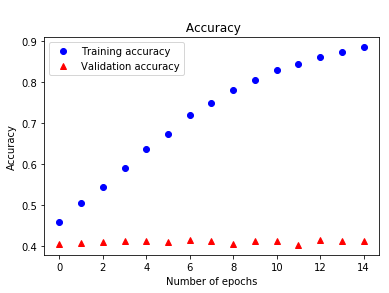

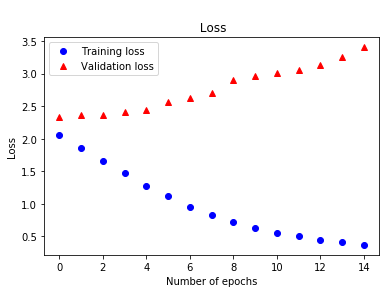

In [35]:
plot_history('2-A.csv', '')

#### Comentarios

Podemos observar que el tiempo que demora cada epoch es bastante elevado, entre 4 y 5 minutos. Este tiempo se debe a la inmensa cantidad de parametros que tiene nuestra red, y a que la data no esta preprocesada. Esta se podría preprocesar para bajar considerablemente el tiempo de cada epoch como se vió en la pregunta 1.

Sobre los resultados de la precisión y la perdida, podemos decir que el modelo esta extremadamente **sobreajustado**. Esto se puede arreglar con regularizadores de varios tipos, uno de ellos dropout, como se verá en la parte b).

### b) Dropout 

#### Droput después del pooling

Primero intentaremos situando el dropout de 0.25 luego de las capas de pooling.

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train_norm.shape[1:],activation='relu'))

model.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(100, activation='softmax')) #add clasification layer
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        36928     
__________

In [20]:
optimizer_ = SGD(lr=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])
history_b = model.fit(x_train_norm, y_train, batch_size=128,epochs=15,verbose=1, validation_data=(x_test_norm,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 239s 5ms/step - loss: 4.4168 - acc: 0.0336 - val_loss: 4.0497 - val_acc: 0.0836
Epoch 2/15
50000/50000 [==============================] - 235s 5ms/step - loss: 3.9424 - acc: 0.0941 - val_loss: 3.7184 - val_acc: 0.1478
Epoch 3/15
50000/50000 [==============================] - 235s 5ms/step - loss: 3.6732 - acc: 0.1355 - val_loss: 3.4169 - val_acc: 0.1973
Epoch 4/15
50000/50000 [==============================] - 234s 5ms/step - loss: 3.4249 - acc: 0.1809 - val_loss: 3.2117 - val_acc: 0.2275
Epoch 5/15
50000/50000 [==============================] - 235s 5ms/step - loss: 3.1935 - acc: 0.2234 - val_loss: 3.0110 - val_acc: 0.2690
Epoch 6/15
50000/50000 [==============================] - 235s 5ms/step - loss: 3.0101 - acc: 0.2572 - val_loss: 2.8424 - val_acc: 0.3063
Epoch 7/15
50000/50000 [==============================] - 235s 5ms/step - loss: 2.8453 - acc: 0.2912 - val_loss: 2.6859 - 

In [21]:
# Guardando resultados

import pandas as pd


df_aux = pd.DataFrame(history_b.history)
df_aux.to_csv('2-B-1.csv')


#### Resultados

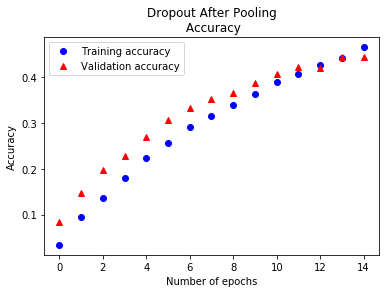

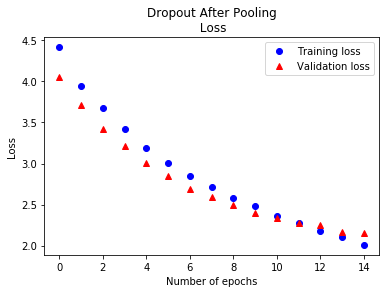

In [34]:
plot_history('2-B-1.csv', 'Dropout After Pooling')

#### Dropout antes del pooling y luego de las capas convolucionales

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train_norm.shape[1:],activation='relu'))

model.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(100, activation='softmax')) #add clasification layer
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
__________

In [8]:
optimizer_ = SGD(lr=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])
history_b_2 = model.fit(x_train_norm, y_train, batch_size=128,epochs=15,verbose=1, validation_data=(x_test_norm,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 262s 5ms/step - loss: 4.3444 - acc: 0.0430 - val_loss: 4.1491 - val_acc: 0.0993
Epoch 2/15
50000/50000 [==============================] - 273s 5ms/step - loss: 3.8383 - acc: 0.1152 - val_loss: 3.7584 - val_acc: 0.1647
Epoch 3/15
50000/50000 [==============================] - 263s 5ms/step - loss: 3.5315 - acc: 0.1691 - val_loss: 3.5158 - val_acc: 0.2186
Epoch 4/15
50000/50000 [==============================] - 255s 5ms/step - loss: 3.2403 - acc: 0.2202 - val_loss: 3.2400 - val_acc: 0.2575
Epoch 5/15
50000/50000 [==============================] - 273s 5ms/step - loss: 3.0050 - acc: 0.2616 - val_loss: 3.1026 - val_acc: 0.2981
Epoch 6/15
50000/50000 [==============================] - 261s 5ms/step - loss: 2.8092 - acc: 0.2998 - val_loss: 2.9505 - val_acc: 0.3124
Epoch 7/15
50000/50000 [==============================] - 261s 5ms/step - loss: 2.6370 - acc: 0.3345 - val_loss: 2.7007 - 

In [10]:
# Guardando resultados

import pandas as pd

df_aux = pd.DataFrame(history_b_2.history)
df_aux.to_csv('2-B-2.csv')

#### Resultados 

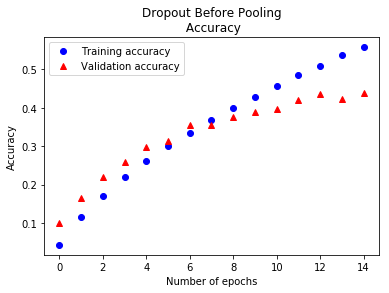

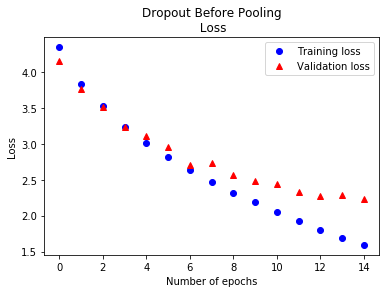

In [33]:
plot_history('2-B-2.csv', 'Dropout Before Pooling')

#### Comentarios

Claramente el dropout ayudo de sobremanera a la red a que el accuracy en el set de validación aumentara a niveles similares a los del set de entrenamiento, eliminandose el sobreajuste. Al observar redes convolucionales de otros proyectos se pudo ver que el dropout es siempre situado luego de cada capa, y luego de la capa de pooling de cada capa convolucional. Se experimento situando el dropout antes y después de la capa de pooling, en ambos casos fue mejor a la red de la pregunta a), sin embargo situarlo después del pooling es mejor, y genera menos sobreajuste.

### c) Visualizando Modelo VGG16

In [11]:
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.engine.input_layer import Input
x_train_vgg = preprocess_input(x_train)
x_test_vgg = preprocess_input(x_test)
input_tensor = Input(shape=x_train_vgg.shape[1:]) #inicializa el tensor
modelVGG = VGG16(weights='imagenet', include_top=False,input_tensor=input_tensor ) # LOAD PRETRAINED MODEL 
features_train = modelVGG.predict(x_train_vgg)
features_test = modelVGG.predict(x_test_vgg)
modelVGG.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

#### Comentarios

Podemos apreciar

La función que debemos importar para normalizar los datos de la manera en que se trabajaron en el modelo VGG16 es la funcion "preprocess_input()". Investigando no encontramos de que manera normaliza exactamente los datos, pero no es de manera standar. 

### d)

In [39]:
model = Sequential()
model.add(Flatten(input_shape=features_train.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))#clasification
model.compile(optimizer=optimizer_,loss='categorical_crossentropy', metrics=['accuracy'])
history_d = model.fit(features_train, y_train,epochs=10, batch_size=128,verbose=1,validation_data=(features_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 5s 101us/step - loss: 14.8219 - acc: 0.0744 - val_loss: 14.6284 - val_acc: 0.0912
Epoch 2/10
50000/50000 [==============================] - 5s 98us/step - loss: 14.7317 - acc: 0.0841 - val_loss: 14.7429 - val_acc: 0.0838
Epoch 3/10
50000/50000 [==============================] - 5s 102us/step - loss: 14.6826 - acc: 0.0879 - val_loss: 14.7542 - val_acc: 0.0833
Epoch 4/10
50000/50000 [==============================] - 5s 99us/step - loss: 14.7823 - acc: 0.0819 - val_loss: 14.7650 - val_acc: 0.0834
Epoch 5/10
50000/50000 [==============================] - 5s 103us/step - loss: 14.7726 - acc: 0.0827 - val_loss: 14.7113 - val_acc: 0.0864
Epoch 6/10
50000/50000 [==============================] - 5s 101us/step - loss: 14.7044 - acc: 0.0872 - val_loss: 14.7486 - val_acc: 0.0843
Epoch 7/10
50000/50000 [==============================] - 5s 106us/step - loss: 14.7117 - acc: 0.0867 - val_loss

In [40]:
# Guardando resultados

import pandas as pd

df_aux = pd.DataFrame(history_d.history)
df_aux.to_csv('2-D.csv')

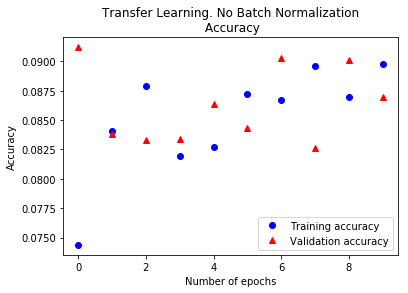

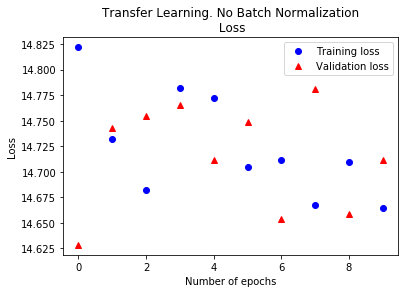

In [41]:
plot_history('2-D.csv', 'Transfer Learning. No Batch Normalization')

#### Comentarios

Podemos ver que el modelo no converge a nada.

### e)

In [44]:
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Flatten(input_shape=features_train.shape[1:]))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))#clasification
model.compile(optimizer=optimizer_,loss='categorical_crossentropy', metrics=['accuracy'])
history_e = model.fit(features_train, y_train,epochs=15, batch_size=128,verbose=1,validation_data=(features_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 8s 155us/step - loss: 3.3019 - acc: 0.2710 - val_loss: 2.4306 - val_acc: 0.3907
Epoch 2/15
50000/50000 [==============================] - 8s 151us/step - loss: 2.4797 - acc: 0.3752 - val_loss: 2.3044 - val_acc: 0.4098
Epoch 3/15
50000/50000 [==============================] - 7s 137us/step - loss: 2.2545 - acc: 0.4149 - val_loss: 2.2443 - val_acc: 0.4248
Epoch 4/15
50000/50000 [==============================] - 8s 157us/step - loss: 2.1187 - acc: 0.4394 - val_loss: 2.2182 - val_acc: 0.4269
Epoch 5/15
50000/50000 [==============================] - 7s 150us/step - loss: 2.0212 - acc: 0.4558 - val_loss: 2.2147 - val_acc: 0.4302
Epoch 6/15
50000/50000 [==============================] - 8s 160us/step - loss: 1.9392 - acc: 0.4717 - val_loss: 2.1908 - val_acc: 0.4415
Epoch 7/15
50000/50000 [==============================] - 7s 150us/step - loss: 1.8640 - acc: 0.4866 - val_loss: 2.1864 - 

In [45]:
# Guardando resultados

import pandas as pd

df_aux = pd.DataFrame(history_e.history)
df_aux.to_csv('2-E.csv')

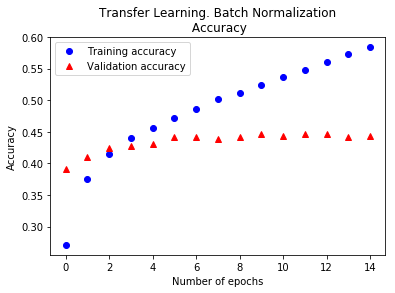

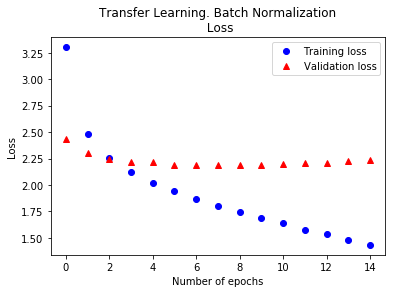

In [47]:
plot_history('2-E.csv', 'Transfer Learning. Batch Normalization')

#### Comentarios

En esta sección se uso Batch Normalization, una técnica que normaliza las activaciones de la capa anterior de donde se aplica, y hace que la media de estas activaciones se mantenga cercana a 0 y la desviación estandar cercana a 1. Esto impide la divergencia vista en la pregunta anterior.

### g) ¿Cuando usar transfer learning?

El entrenamiento de un modelo predictivo usando Transfer learning puede poseer muchas ventajas con respecto a el entrenamiento de una red convencional. El uso de transfer learning puede hacer que la curva de aprendizaje de nuestro modelo parta desde un punto mas alto, y por ende tenga la posibilidad de llegar a un mayor grado de conocimiento. En ocaciones en las que tengamos pocos datos, pero si tengamos la posibilidad de absorber el conocimiento de otro modelo, usar Transfer Learning nos puede permitir hacer modelos bastante interesantes y exitosos, que sin Transfer Learning no sería posible.